In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
import seaborn as sns
from scipy import stats,optimize
import utils.datasets as ds
import utils.transforms as tf
import utils.gaussians as gs
# import cma

(0.0, 10.0)

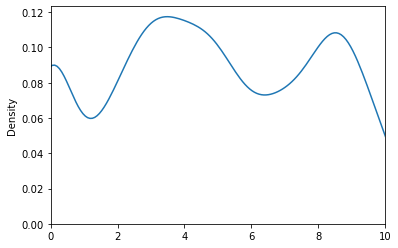

In [2]:
data = ds.window_data()
mydata = data.Pain.values
mylabels = data.Group.values
# sns.kdeplot(mydata)
# plt.gca().set_xlim([0, 10])

In [3]:
# x0 = [1, 1, 5, 1, 8, 1]
# res = cma.fmin(gmm_even, x0, 1, args=(mydata,))

In [4]:
nm_result = optimize.minimize(gs.gmm_even, [1, 1, 5, 1, 8, 1], method='Nelder-Mead', args=(mydata))
print(nm_result)

 final_simplex: (array([[1.36567661, 1.37828234, 4.50915543, 1.20368122, 8.37145927,
        1.0248772 ],
       [1.36561901, 1.37826492, 4.50909892, 1.2036371 , 8.37141337,
        1.02490848],
       [1.36563928, 1.37823904, 4.50910094, 1.20364083, 8.37137938,
        1.02489841],
       [1.3656537 , 1.37831407, 4.509169  , 1.20370869, 8.37143105,
        1.02489249],
       [1.36558795, 1.37821245, 4.50914464, 1.20369145, 8.37143137,
        1.02488883],
       [1.36560614, 1.37824836, 4.50917902, 1.20365283, 8.37143803,
        1.02487814],
       [1.36574961, 1.37828434, 4.50921631, 1.20367664, 8.37141026,
        1.02489777]]), array([5371.78141444, 5371.78141455, 5371.78141468, 5371.78141483,
       5371.78141485, 5371.78141486, 5371.7814152 ]))
           fun: 5371.781414439027
       message: 'Optimization terminated successfully.'
          nfev: 349
           nit: 221
        status: 0
       success: True
             x: array([1.36567661, 1.37828234, 4.50915543, 1.2036812

## Gaussian Mixture

$p(x) = \alpha N(x;\mu_1, \sigma_1) + (1-\alpha) N(x; \mu_2, \sigma_2)$

1 Clusters:
Log-likelihood: -5617.3863208822195
Centers: [4.78888175]
Std. Devs: [3.0771758] 

2 Clusters:
Log-likelihood: -5488.284698057166
Centers: [2.44310852 7.49070675]
Std. Devs: [1.81443215 1.71631213] 

3 Clusters:
Log-likelihood: -5371.781414757595
Centers: [1.36569567 4.50917195 8.37141285]
Std. Devs: [1.3782421  1.20364699 1.02489092] 



(0.0, 10.0)

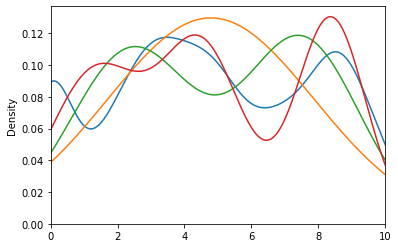

In [5]:
x = np.linspace(0, 10, 201)
sns.kdeplot(mydata)
for n_clusters in range(1, 4):
    spacing = 10/(n_clusters+1)
    meanlist = [spacing*(i+1) for i in range(n_clusters)]
    x0 = []
    for m in meanlist:
        x0.append(m)
        x0.append(1)
    nm_result = optimize.minimize(gs.gmm_even, x0, method='Nelder-Mead', args=(mydata))
    y = gs.gmm_func(x, params=[1/n_clusters for i in range(n_clusters-1)]+list(nm_result.x))
    plt.plot(x, y)
    print(f'{n_clusters} Clusters:')
    print(f'Log-likelihood: {-nm_result.fun}')
    print(f'Centers: {nm_result.x[::2]}')
    print(f'Std. Devs: {nm_result.x[1::2]} \n')
plt.gca().set_xlim([0, 10])

1 Clusters:
Log-likelihood: -5617.386320765934
Weights: [1.]
Centers: [4.78890901]
Std. Devs: [9.46908125] 

2 Clusters:
Log-likelihood: -5409.997594167784
Weights: [0.30705388 0.69294612]
Centers: [8.43101019 3.17504428]
Std. Devs: [1.01365694 4.73337716] 

3 Clusters:
Log-likelihood: -3406.447768683727
Weights: [0.13488586 0.32701966 0.53809448]
Centers: [0.         8.38177631 3.80584345]
Std. Devs: [1.00000000e-06 1.05081081e+00 2.39846175e+00] 



(0.0, 0.2)

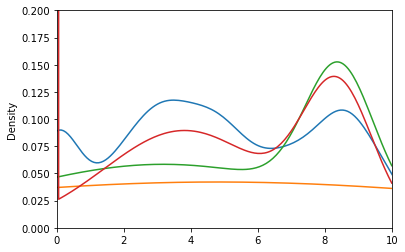

In [6]:
x = np.linspace(0, 10, 201)
sns.kdeplot(mydata)
for n_clusters in range(1, 4):
    gm = mixture.GaussianMixture(n_components=n_clusters).fit(mydata.reshape(-1, 1))
    paramlist = []
    for m, c in zip(gm.means_.ravel(), gm.covariances_.ravel()):
        paramlist.append(m)
        paramlist.append(c)
    y = gs.gmm_func(x, params=list(gm.weights_[:-1].ravel())+paramlist)
    plt.plot(x, y)
    print(f'{n_clusters} Clusters:')
    print(f'Log-likelihood: {gm.score(mydata.reshape(-1, 1))*len(mydata)}')
    print(f'Weights: {gm.weights_.ravel()}')
    print(f'Centers: {gm.means_.ravel()}')
    print(f'Std. Devs: {gm.covariances_.ravel()} \n')
plt.gca().set_xlim([0, 10])
plt.gca().set_ylim([0, 0.2])

## Beta Mixture

$p(x) = \alpha \beta(x;a_1, b_1) + (1-\alpha) \beta(x; a_2, b_2)$

/media/hdd/CurrentProjects/painproject/Code/utils/gaussians.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return x**(a-1)*(1-x)**(b-1)/B
/home/gknave/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/media/hdd/CurrentProjects/painproject/Code/utils/gaussians.py:11: RuntimeWarning: divide by zero encountered in power
  return x**(a-1)*(1-x)**(b-1)/B


2 Clusters:
Log-likelihood: inf
Weights: [0.7447037182091831, 0.25529628179081687]
Beta Params: [[ 1.43955981  0.75776273]
 [24.60846906  4.69011885]]
Means: [6.551426954762102, 8.399199692507418]
Std. devs: [2.658241547634697, 0.6661566056875292] 

3 Clusters:
Log-likelihood: 37600000216.63419
Weights: [0.6766159233162927, 3.079452587880495e-05, 0.32335328215782844]
Beta Params: [[ 2.92822653  4.48350346]
 [11.08060152  9.45611595]
 [13.28717158  2.80350862]]
Means: [3.9508003319013154, 5.395507599572089, 8.257681722119834]
Std. devs: [1.6855779399478221, 1.0740321435805624, 0.917514934875916] 

4 Clusters:
Log-likelihood: 37600000219.22596
Weights: [0.12453625053942347, 0.36679650496127003, 0.1421208953784776, 0.36654634912082895]
Beta Params: [[ 1.78860938  3.46247574]
 [ 4.44799096  8.71997209]
 [11.28123782 11.03376465]
 [11.00368173  2.60267073]]
Means: [3.4061709916345073, 3.3778883941448696, 5.055449953656115, 8.087164994831271]
Std. devs: [1.8955024808269847, 1.256513584744144

(0.0, 0.2)

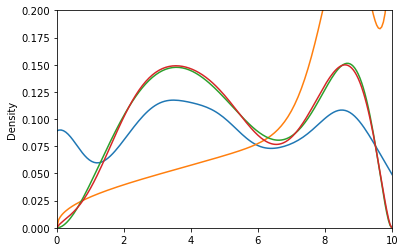

In [7]:
x = np.linspace(0, 10, 201)
sns.kdeplot(mydata)
for n_clusters in range(2, 5):
    spacing = 1/(n_clusters+1)
    meanlist = [spacing*(i+1) for i in range(n_clusters)]
#     x0 = []
#     bounds = []
    x0 = [1/n_clusters for i in range(n_clusters-1)]
    bounds = [(0, 1) for i in range(n_clusters-1)]
    for m in meanlist:
        a, b = gs.norm_to_beta(m, 0.1)
        x0.append(a)
        x0.append(b)
        bounds.append((0.001, None))
        bounds.append((0.001, None))
    nm_result = optimize.minimize(gs.betamixture_ll, x0, method='Nelder-Mead', args=(mydata/10), bounds=bounds)
#     y = gs.bmm_func(x/10, params=[1/n_clusters for i in range(n_clusters-1)]+list(nm_result.x))
    y = gs.bmm_func(x/10, params=list(nm_result.x))
    plt.plot(x, y/10)
    wparams = nm_result.x[:n_clusters-1]
    wparams = list(wparams)+[1-np.sum(wparams),]
    betaparams = nm_result.x[n_clusters-1:].reshape((n_clusters, 2))
    print(f'{n_clusters} Clusters:')
    print(f'Log-likelihood: {-nm_result.fun}')
    print(f'Weights: {wparams}')
    print(f'Beta Params: {betaparams}')
    means = [10*gs.beta_to_norm(p[0], p[1])[0] for p in betaparams]
    stddevs = [10*gs.beta_to_norm(p[0], p[1])[1] for p in betaparams]
    print(f'Means: {means}')
    print(f'Std. devs: {stddevs} \n')
plt.gca().set_xlim([0, 10])
plt.gca().set_ylim([0, 0.2])

## Maximum Gaussian

$p(x) = \max\{N(x;\mu_1, \sigma_1), N(x; \mu_2, \sigma_2)\}$

1 Clusters:
Log-likelihood: -5617.3863208822195
Centers: [4.78888175]
Std. Devs: [3.0771758] 

2 Clusters:
Log-likelihood: -5625.007126194111
Centers: [2.77288884 8.17092584]
Std. Devs: [1.86468433 1.12486477] 

3 Clusters:
Log-likelihood: 12208.539939170301
Centers: [2.67067724e-27 3.13894383e+00 7.93162865e+00]
Std. Devs: [-3.00646653e-27  1.41099894e+00  1.09154046e+00] 



(0.0, 0.2)

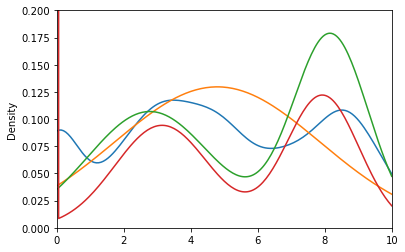

In [8]:
x = np.linspace(0, 10, 201)
sns.kdeplot(mydata)
for n_clusters in range(1, 4):
    spacing = 10/(n_clusters+1)
    meanlist = [spacing*(i+1) for i in range(n_clusters)]
    x0 = []
    for m in meanlist:
        x0.append(m)
        x0.append(1)
    nm_result = optimize.minimize(gs.maxnormal_ll, x0, method='Nelder-Mead', args=(mydata))
    y = gs.gmm_func(x, params=[1/n_clusters for i in range(n_clusters-1)]+list(nm_result.x))
    plt.plot(x, y)
    print(f'{n_clusters} Clusters:')
    print(f'Log-likelihood: {-nm_result.fun}')
    print(f'Centers: {nm_result.x[::2]}')
    print(f'Std. Devs: {nm_result.x[1::2]} \n')
plt.gca().set_xlim([0, 10])
plt.gca().set_ylim([0, 0.2])

In [9]:
a, b = 10, 0.5
betadata = stats.beta.rvs(a, b, size=50000)

In [10]:
x0 = [2, 9]
res = optimize.minimize(gs.bmm_even, x0, method='Nelder-Mead', args=(betadata,), bounds=[(0.001, None), (0.001, None)])
print(res)

 final_simplex: (array([[9.95778031, 0.49768856],
       [9.95772866, 0.49768482],
       [9.95785561, 0.49769002]]), array([-112102.17712019, -112102.17711977, -112102.17711966]))
           fun: -112102.17712019326
       message: 'Optimization terminated successfully.'
          nfev: 140
           nit: 72
        status: 0
       success: True
             x: array([9.95778031, 0.49768856])


In [13]:
# x = np.linspace(0.001, 0.999, 1000)
# sns.kdeplot(singlebeta, linewidth=3)
# _ = plt.hist(singlebeta, bins=list(np.arange(0, 1.02, 0.01)), density=True, color='gray')
# vals = [gs.beta(y, a=a, b=b) for y in x]
# plt.plot(x, vals, linewidth=3, color='purple')
# vals2 = [gs.beta(y, a=res.x[0], b=res.x[1]) for y in x]
# plt.plot(x, vals2, linewidth=3)
# plt.gca().set_xlim([0, 1])

NameError: name 'singlebeta' is not defined

In [14]:
# num = 50
# A = np.linspace(0.05, 20, num)
# B = np.linspace(0.01, 3, num)
# betatests = np.zeros((num, num))
# for i, a in enumerate(A):
#     for j, b in enumerate(B):
#         betatests[i, j] = gs.bmm_even([a, b], data=singlebeta)

NameError: name 'singlebeta' is not defined

/home/gknave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


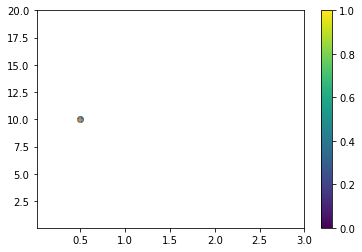

In [15]:
# plt.contour(B, A, betatests, levels=300)
# plt.scatter(0.5, 10)
# plt.scatter(res.x[1], res.x[0], marker='+')
# plt.colorbar()

In [11]:
def mmparams(params):
    n = int((params.shape[0]+1)/3)
    weights = params[:n-1]
    allweights = np.concatenate((weights, [1-np.sum(weights),]))
    p_array = params[n-1:].reshape((n,2))
    return allweights, p_array

In [12]:
def initparams(n_clusters):
    spacing = 1/(n_clusters+1)
    meanlist = [spacing*(i+1) for i in range(n_clusters)]
    x0 = [1/n_clusters for i in range(n_clusters-1)]
    for m in meanlist:
        a, b = gs.norm_to_beta(m, 0.1)
        x0.append(a)
        x0.append(b)
    return x0

def Q(params, oldparams=None, data=None):
    n = int((params.shape[0]+1)/3)
    # Figure out last weight given other weights and concatenate
    weights = params[:n-1]
    oldweights = oldparams[:n-1]
    allweights = np.concatenate((weights, [1-np.sum(weights),]))
    allweights_old = np.concatenate((oldweights, [1-np.sum(oldweights),]))
    # Extract mean, standard deviation parameters
    p_array = params[n-1:].reshape((n,2))
    p_array_old = oldparams[n-1:].reshape((n,2))
    q_out = 0
    for x in data:
        f = 0
        gammadenom = np.sum([w*gs.beta(x, a=p[0], b=p[1]) \
                             for (w, p) in zip(allweights_old, p_array_old)])
        for (w, p, wt, pt) in zip(allweights, p_array, allweights_old, p_array_old):
            gammaij = wt*gs.beta(x, a=pt[0], b=pt[1])/gammadenom
            q_out += gammaij*np.log(w*gs.beta(x, a=p[0], b=p[1]))
    return -q_out


In [13]:
def getbounds(n_clusters):
    bounds = [(0.1, 0.8) for i in range(n_clusters-1)]
    bounds += [(0.1, None) for i in range(2*n_clusters)]
    return bounds

In [14]:
x0 = initparams(3)
print(x0)

[0.3333333333333333, 0.3333333333333333, 4.437499999999999, 13.312499999999996, 11.999999999999998, 11.999999999999998, 13.312499999999996, 4.437499999999999]


In [31]:
old_params = np.array(x0)
data = (mydata+0.001)/10.01

n = int((old_params.shape[0]+1)/3)
bounds = getbounds(n)

# new_params = optimize.minimize(Q, old_params, method='Nelder-Mead', \
#                               args=(old_params, data), bounds=bounds)
new_params = optimize.minimize(Q, x0, method='Nelder-Mead', \
                              args=(new_params.x, data), bounds=bounds)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log


In [32]:
print(new_params)

 final_simplex: (array([[0.30651765, 0.32788899, 0.20433212, 0.76581776, 5.4697765 ,
        8.63310825, 2.7856948 , 0.76920064],
       [0.29791225, 0.31966571, 0.20776706, 0.7771543 , 5.37824937,
        8.37072174, 2.57510159, 0.74474465],
       [0.29147664, 0.32537725, 0.20728528, 0.77392802, 5.52145725,
        8.57020645, 2.92730043, 0.80689539],
       [0.30495245, 0.33086751, 0.21113938, 0.7117946 , 5.53604345,
        8.54651846, 2.73091546, 0.77291274],
       [0.31568504, 0.31684309, 0.20363404, 0.76069994, 5.38219103,
        8.3384355 , 2.74680867, 0.80038792],
       [0.30055866, 0.32662058, 0.21576076, 0.84156527, 5.4699949 ,
        8.37652414, 2.77980391, 0.76827078],
       [0.31333442, 0.31642832, 0.20366992, 0.80953091, 5.53820319,
        8.5545528 , 2.73247573, 0.7455255 ],
       [0.30187437, 0.32478524, 0.21817745, 0.76515149, 5.28860254,
        8.30478141, 2.75081815, 0.78153114],
       [0.30626727, 0.32269486, 0.20628225, 0.83341541, 6.01330364,
        9.4

In [ ]:
def Q_grouped(params, oldparams=None, data=None):
    n = int((params.shape[0]+1)/3)
    # Figure out last weight given other weights and concatenate
    weights = params[:n-1]
    oldweights = oldparams[:n-1]
    allweights = np.concatenate((weights, [1-np.sum(weights),]))
    allweights_old = np.concatenate((oldweights, [1-np.sum(oldweights),]))
    # Extract mean, standard deviation parameters
    p_array = params[n-1:].reshape((n,2))
    p_array_old = oldparams[n-1:].reshape((n,2))
    q_out = 0
    for x in data:
        f = 0
        gammadenom = np.sum([w*gs.beta(x, a=p[0], b=p[1]) \
                             for (w, p) in zip(allweights_old, p_array_old)])
        for (w, p, wt, pt) in zip(allweights, p_array, allweights_old, p_array_old):
            gammaij = wt*gs.beta(x, a=pt[0], b=pt[1])/gammadenom
            q_out += gammaij*np.log(w*gs.beta(x, a=p[0], b=p[1]))
    return -q_out

In [ ]:
oldparams = np.array(x0)

params = np.array([0.3, 0.6, 2, 50, 8, 8, 12, 6])
data = (mydata+0.00001)/10.0001

n = int((params.shape[0]+1)/3)
# Figure out last weight given other weights and concatenate
weights = params[:n-1]
oldweights = oldparams[:n-1]
allweights = np.concatenate((weights, [1-np.sum(weights),]))
allweights_old = np.concatenate((oldweights, [1-np.sum(oldweights),]))
# Extract mean, standard deviation parameters
p_array = params[n-1:].reshape((n,2))
p_array_old = oldparams[n-1:].reshape((n,2))
q_out = 0
for x in data:
#     print(x)
    gammadenom = np.sum([w*gs.beta(x, a=p[0], b=p[1]) \
                         for (w, p) in zip(allweights_old, p_array_old)])
    for (w, p, wt, pt) in zip(allweights, p_array, allweights_old, p_array_old):
        gammaij = wt*gs.beta(x, a=pt[0], b=pt[1])/gammadenom
        q_out += gammaij*np.log(w*gs.beta(x, a=p[0], b=p[1]))
#     print(gammaij, q_out)
    if np.isnan(q_out):
        print(x)
    q_out=0

(0.0, 1.0)

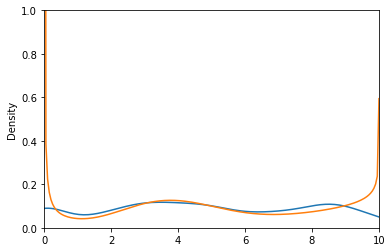

In [34]:
sns.kdeplot(10*data)
x = np.linspace(0.001, 9.999, 201)
y = gs.bmm_func(x/10, params=list(new_params.x))
plt.plot(x, y/10)
plt.gca().set_xlim([0, 10])
plt.gca().set_ylim([0, 1])

In [22]:
def EMbeta(data, maxiter=200):
    thetaT = initparams(data)
    lastQ = -100000
    Qval = -10000
    i = 0
    while (Qval-lastQ)>1e-8 and i <= maxiter:
        lastQ = Qval
        Qval = 
        i += 0

SyntaxError: invalid syntax (<ipython-input-22-d58c016a5d33>, line 8)